# Homework 1
## Nur Gündoğdu

## Task 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d18 = pd.read_csv("C:/Users/n__gu/Desktop/582/2018.csv")
d19 = pd.read_csv("C:/Users/n__gu/Desktop/582/2019.csv")
d20 = pd.read_csv("C:/Users/n__gu/Desktop/582/2020.csv")

In [3]:
data = pd.concat([d18, d19, d20], ignore_index=True, levels=None, copy=True)
data.drop(data.columns[56:], axis=1, inplace=True)

#### Question 1

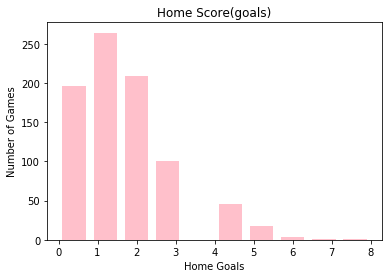

In [4]:
plt.hist(data["FTHG"], rwidth=0.75, color="pink")
plt.xlabel("Home Goals")
plt.ylabel("Number of Games")
plt.title("Home Score(goals)")
plt.show()

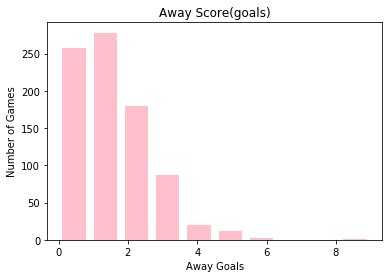

In [5]:
plt.hist(data["FTAG"], rwidth=0.75, color="pink")
plt.xlabel("Away Goals")
plt.ylabel("Number of Games")
plt.title("Away Score(goals)")
plt.show()

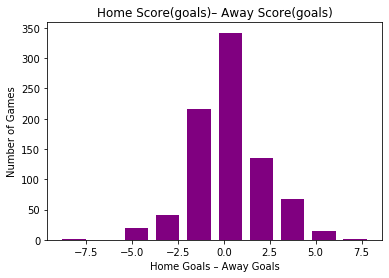

In [6]:
data["FTHG"]-data["FTAG"]
plt.hist(data["FTHG"]-data["FTAG"],color="purple",rwidth=0.75)
plt.xlabel("Home Goals – Away Goals")
plt.ylabel("Number of Games")
plt.title("Home Score(goals)– Away Score(goals)")
plt.show()


#### Question 2

In [7]:
import statistics as st
from scipy.stats import poisson

In [8]:
h_mean = st.mean(data["FTHG"])
a_mean = st.mean(data["FTAG"])
print(round(h_mean,2))
print(round(a_mean,2))

1.54
1.27


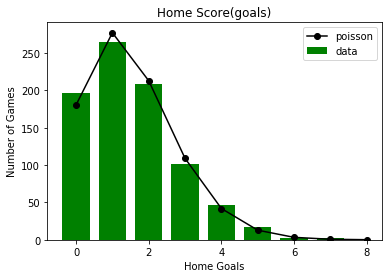

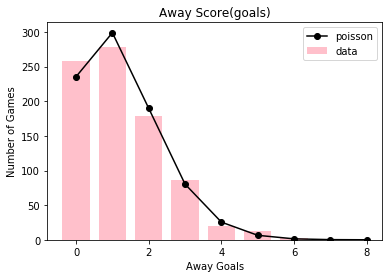

In [21]:
poi = poisson.pmf(np.arange(0,9), h_mean)*len(data)
n, bins, patches = plt.hist(data["FTHG"], np.arange(9),color='green', align = "left",rwidth=0.75,label="data")
plt.plot(bins, poi, color='black', marker='o',label="poisson")
plt.xlabel("Home Goals")
plt.ylabel("Number of Games")
plt.title("Home Score(goals)")
plt.legend(loc="upper right")
plt.show()


poi = poisson.pmf(np.arange(0,9), a_mean)*len(data)
n, bins, patches = plt.hist(data["FTAG"], np.arange(9),color='pink',align = "left",rwidth=0.75,label="data")
plt.plot(bins, poi, color='black', marker='o',label="poisson")
plt.xlabel("Away Goals")
plt.ylabel("Number of Games")
plt.title("Away Score(goals)")
plt.legend(loc="upper right")
plt.show()

The distribution of home goals and away goals looks like Poisson distribution. As seen on the plots, histogram is aligned with probability mass function of poisson distribution. The mean of the poisson distibution of home goals is 1.54, and 1.27 for away goals.

## Task 2

#### Question 1
Probability calculation from odds given by Bet365, BetandWin, VC, and WH.

In [10]:
prb = 1 / data[["B365H","B365D","B365A","BWH","BWD","BWA","VCH","VCD","VCA","WHH","WHD","WHA"]]
data[["B365Hp","B365Dp","B365Ap","BWHp","BWDp","BWAp","VCHp","VCDp","VCAp",
            "WHHp","WHDp","WHAp"]] = prb

data["Bet365_total"] = data.apply(lambda x: sum(x[["B365Hp","B365Dp","B365Ap"]]),axis=1)
data["BetAndWin_total"] = data.apply(lambda x: sum(x[["BWHp","BWDp","BWAp"]]),axis=1)
data["VC_total"] = data.apply(lambda x: sum(x[["VCHp","VCDp","VCAp"]]),axis=1)
data["WH_total"] = data.apply(lambda x: sum(x[["WHHp","WHDp","WHAp"]]),axis=1)

#### Question 2
Normalization of probabilities from odds given by Bet365, BetandWin, VC, and WH.

In [11]:
data[["B365H_np","B365D_np","B365A_np"]] = data.apply(
                                                lambda x: x[["B365Hp","B365Dp","B365Ap"]]/x["Bet365_total"], axis=1)
data[["BWH_np","BWD_np","BWA_np"]] = data.apply(
                                                lambda x: x[["BWHp","BWDp","BWAp"]]/x["BetAndWin_total"], axis=1)
data[["VCH_np","VCD_np","VCA_np"]] = data.apply(
                                                lambda x: x[["VCHp","VCDp","VCAp"]]/x["VC_total"], axis=1)
data[["WHH_np","WHD_np","WHA_np"]] = data.apply(
                                                lambda x: x[["WHHp","WHDp","WHAp"]]/x["WH_total"], axis=1)
data[["B365H_np","B365D_np","B365A_np", "BWH_np","BWD_np","BWA_np","VCH_np","VCD_np","VCA_np", "WHH_np","WHD_np","WHA_np" ]]

,B365H_np,B365D_np,B365A_np,BWH_np,BWD_np,BWA_np,VCH_np,VCD_np,VCA_np,WHH_np,WHD_np,WHA_np
0,0.620387,0.249745,0.129868,0.630318,0.241097,0.128585,0.618511,0.242766,0.138723,0.597077,0.246687,0.156235
1,0.512821,0.270655,0.216524,0.502351,0.280725,0.216924,0.522704,0.271516,0.205780,0.494263,0.269726,0.236011
2,0.389313,0.286260,0.324427,0.388662,0.288552,0.322787,0.389313,0.286260,0.324427,0.382055,0.283647,0.334298
3,0.150099,0.243911,0.605990,0.151896,0.243423,0.604681,0.150663,0.244827,0.604511,0.161774,0.240588,0.597638
4,0.248382,0.276769,0.474849,0.250896,0.272401,0.476703,0.249738,0.286464,0.463799,0.247454,0.293851,0.458695
...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.519828,0.253676,0.226496,0.514257,0.253700,0.232043,0.530086,0.257880,0.212034,0.527508,0.253204,0.219288
834,0.134333,0.217166,0.648502,0.158742,0.226774,0.614484,0.137787,0.219207,0.643006,0.146317,0.219644,0.634039
835,0.412126,0.296216,0.291658,0.422853,0.297318,0.279829,0.401173,0.305045,0.293782,0.402010,0.298995,0.298995
836,0.490722,0.227835,0.281443,0.489083,0.238428,0.272489,0.475951,0.244078,0.279971,0.475951,0.244078,0.279971


#### Question 3
Discretization into bins.

In [12]:
data["draw"] = data["FTR"].apply(lambda x: 1 if x=="D" else 0)
bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
midpoint = [-0.875, -0.625, -0.375, -0.125, 0.125, 0.375, 0.625, 0.875]

#### Question 4
Plot for each bookmaker.

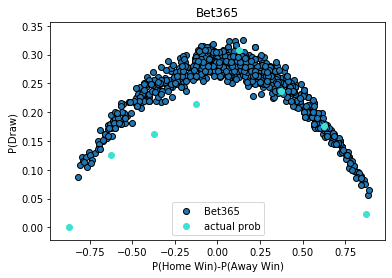

In [13]:
data["B365_dif"] = data["B365H_np"]-data["B365A_np"]
data["difference"] = pd.cut(data["B365_dif"], bins, right=True, labels=False) + 1
actual_prob = data.groupby(["difference"]).sum()/data.groupby(["difference"]).count()

plt.scatter(data["B365_dif"], data["B365D_np"], marker='o',c="tab:blue",edgecolors="black",
            label="Bet365")
plt.scatter(midpoint, actual_prob["draw"],color="turquoise",label="actual prob")
plt.xlabel("P(Home Win)-P(Away Win)")
plt.ylabel("P(Draw)")
plt.title("Bet365")
plt.legend(loc="lower center")
plt.show()

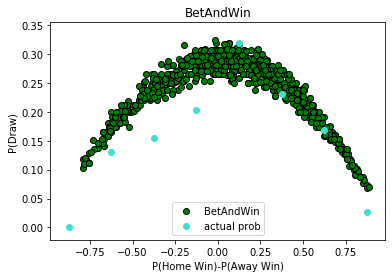

In [14]:
data["BW_dif"] = data["BWH_np"]-data["BWA_np"]
data["difference"] = pd.cut(data["BW_dif"], bins, right=True, labels=False) + 1
actual_prob = data.groupby(["difference"]).sum()/data.groupby(["difference"]).count()

plt.scatter(data["BW_dif"], data["BWD_np"], marker='o',c="g",edgecolors="black",
            label="BetAndWin")
plt.scatter(midpoint, actual_prob["draw"],color="turquoise",label="actual prob")
plt.xlabel("P(Home Win)-P(Away Win)")
plt.ylabel("P(Draw)")
plt.title("BetAndWin")
plt.legend(loc="lower center")
plt.show()

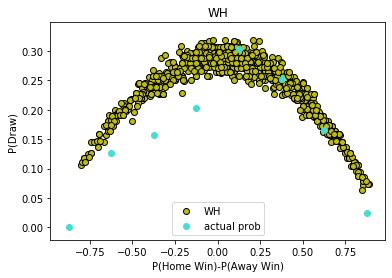

In [15]:
data["WH_dif"] = data["WHH_np"]-data["WHA_np"]
data["difference"] = pd.cut(data["WH_dif"], bins, right=True, labels=False) + 1
actual_prob = data.groupby(["difference"]).sum()/data.groupby(["difference"]).count()

plt.scatter(data["WH_dif"], data["WHD_np"], marker='o',c="y",edgecolors="black",
            label="WH")
plt.scatter(midpoint, actual_prob["draw"],color="turquoise",label="actual prob")
plt.xlabel("P(Home Win)-P(Away Win)")
plt.ylabel("P(Draw)")
plt.title("WH")
plt.legend(loc="lower center")
plt.show()

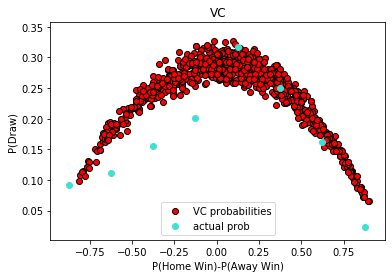

In [16]:
data["VC_dif"] = data["VCH_np"]-data["VCA_np"]
data["difference"] = pd.cut(data["VC_dif"], bins, right=True, labels=False) + 1
actual_prob = data.groupby(["difference"]).sum()/data.groupby(["difference"]).count()

plt.scatter(data["VC_dif"], data["VCD_np"], marker='o',c="r", edgecolors="black",
            label="VC probabilities")
plt.scatter(midpoint, actual_prob["draw"],color="turquoise",label="actual prob")
plt.xlabel("P(Home Win)-P(Away Win)")
plt.ylabel("P(Draw)")
plt.title("VC")
plt.legend(loc="lower center")
plt.show()

All 4 bookmakers scatter plot looks like normal distribution. 
Bias of an estimator is the difference between the estimator's guess and true value. For all 4 bookmakers, the difference between their estimation and actual probability is positive between [-1,0]. This difference becomes negative for values between roughly [0, 0.5], positive again after 0.5. Hence we can conclude that the bookmakers are biased. 

### Task3

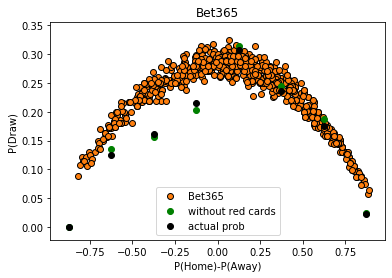

In [17]:
data["TotalRedCards"] = data["HR"] + data["AR"]
noRC = data[data["TotalRedCards"] == 0].copy()

noRC["difference"] = pd.cut(noRC["B365_dif"], bins, right=True, labels=False) + 1
actual_prob = noRC.groupby(["difference"]).sum()/noRC.groupby(["difference"]).count()

plt.scatter(noRC["B365_dif"], noRC["B365D_np"], marker='o',c="tab:orange",edgecolors="black",
            label="Bet365")
plt.scatter(midpoint,actual_prob["draw"],color="green",label="without red cards")

data["difference"] = pd.cut(data["B365_dif"], bins, right=True, labels=False) + 1
actual_prob = data.groupby(["difference"]).sum()/data.groupby(["difference"]).count()
plt.scatter(midpoint,actual_prob["draw"],color="black",label="actual prob")

plt.xlabel("P(Home)-P(Away)")
plt.ylabel("P(Draw)")
plt.title("Bet365")
plt.legend(loc="lower center")
plt.show()

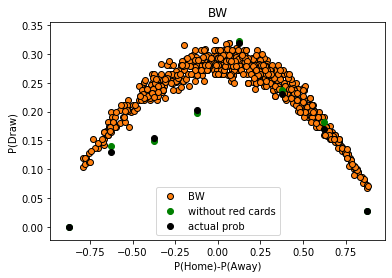

In [18]:
noRC["difference"] = pd.cut(noRC["BW_dif"], bins, right=True, labels=False) + 1
actual_prob = noRC.groupby(["difference"]).sum()/noRC.groupby(["difference"]).count()

plt.scatter(noRC["BW_dif"], noRC["BWD_np"], marker='o',c="tab:orange",edgecolors="black",
            label="BW")
plt.scatter(midpoint,actual_prob["draw"],color="green",label="without red cards")

data["difference"] = pd.cut(data["BW_dif"], bins, right=True, labels=False) + 1
actual_prob = data.groupby(["difference"]).sum()/data.groupby(["difference"]).count()
plt.scatter(midpoint,actual_prob["draw"],color="black",label="actual prob")

plt.xlabel("P(Home)-P(Away)")
plt.ylabel("P(Draw)")
plt.title("BW")
plt.legend(loc="lower center")
plt.show()

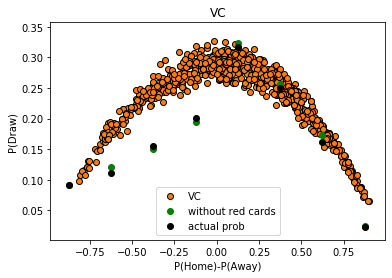

In [19]:
noRC["difference"] = pd.cut(noRC["VC_dif"], bins, right=True, labels=False) + 1
actual_prob = noRC.groupby(["difference"]).sum()/noRC.groupby(["difference"]).count()

plt.scatter(noRC["VC_dif"], noRC["VCD_np"], marker='o',c="tab:orange",edgecolors="black",
            label="VC")
plt.scatter(midpoint,actual_prob["draw"],color="green",label="without red cards")

data["difference"] = pd.cut(data["VC_dif"], bins, right=True, labels=False) + 1
actual_prob = data.groupby(["difference"]).sum()/data.groupby(["difference"]).count()
plt.scatter(midpoint,actual_prob["draw"],color="black",label="actual prob")

plt.xlabel("P(Home)-P(Away)")
plt.ylabel("P(Draw)")
plt.title("VC")
plt.legend(loc="lower center")
plt.show()

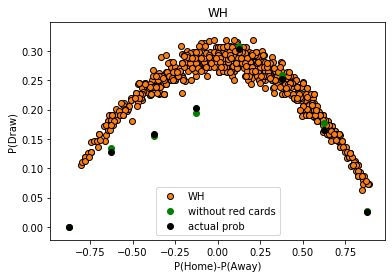

In [20]:
noRC["difference"] = pd.cut(noRC["WH_dif"], bins, right=True, labels=False) + 1
actual_prob = noRC.groupby(["difference"]).sum()/noRC.groupby(["difference"]).count()

plt.scatter(noRC["WH_dif"], noRC["WHD_np"], marker='o',c="tab:orange",edgecolors="black",
            label="WH")
plt.scatter(midpoint,actual_prob["draw"],color="green",label="without red cards")

data["difference"] = pd.cut(data["WH_dif"], bins, right=True, labels=False) + 1
actual_prob = data.groupby(["difference"]).sum()/data.groupby(["difference"]).count()
plt.scatter(midpoint,actual_prob["draw"],color="black",label="actual prob")

plt.xlabel("P(Home)-P(Away)")
plt.ylabel("P(Draw)")
plt.title("WH")
plt.legend(loc="lower center")
plt.show()

Actual outcome overall is very similar to actual outcome with no red cards. There is no significant change from results of Task 2. We can conclude that red cards' effect is not significant on the result.